# Compresión de imágenes y vídeos via wavelets

## Abstract

En este proyecto se presenta un estudio sobre la compresión de imágenes y vídeo utilizando wavelets. Se comienza con una revisión teórica de los fundamentos de los wavelets y su aplicación en la compresión de imágenes. Posteriormente, se extiende el estudio a la compresión de vídeo, donde se analiza la aplicación de los wavelets en la compresión de secuencias de imágenes. Finalmente, se concluye el proyecto con una discusión sobre los resultados obtenidos y las posibles aplicaciones de la compresión de imágenes y vídeo vía wavelets.

## Contenidos teóricos

Como todo buen trabajo, tiene un motivo de interés de estudio detrás; en nuestro caso, nos centramos en la compresión de imágenes y vídeos.

¿Qué es una imagen?

Una imagen puede considerarse como una señal bidimensional en la que cada píxel representa valores de intensidad lumínica o de color en una ubicación específica. Es decir, cada punto de la imagen es un píxel que contiene información sobre su color y posición.

Antes de adentrarnos en el estudio de cómo comprimir vídeos, es fundamental comprender cómo se comprime una imagen. Esencialmente, se trata de representar la información visual de una manera más eficiente, reduciendo la cantidad de datos necesarios para almacenar o transmitir la imagen sin comprometer significativamente su calidad perceptible.

La compresión de imágenes juega un papel crucial en una amplia gama de aplicaciones, desde el almacenamiento eficiente de datos visuales hasta la transmisión rápida y efectiva de información gráfica en diversas plataformas y dispositivos.

La compresión de imágenes hace uso de las transformadas wavelet y sus diversas familias.

Una wavelet u ondícula es una pequeña onda cuya energía está concentrada en un periodo de tiempo limitado. Su forma es la de una onda característica que oscila, lo que permite realizar análisis temporales y frecuenciales. Esta herramienta resulta de gran utilidad en el estudio de fenómenos que varían en el tiempo.


## Procedimiento práctico


### Búsqueda de referencias o trabajos similares

Previo a la realización de cualquier actividad práctica, se cree conveniente realizar un apequeña revisión bibliográfica con el fin de poder tener una idea de las posibilidades que ofrecen los wavelets. En este rumbo, encontramos los siguientes trabajos:

- Familias de wavelets en Matlab - https://es.mathworks.com/help/wavelet/gs/introduction-to-the-wavelet-families.html

- Introducción a los wavelets en Python - https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

- Conceptos básicos de procesado de señales - https://www.kaggle.com/code/faressayah/signal-processing-with-python

- Paso de la FT a la WT - https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

- Compresión de imágenes usando wavelets - https://ieeexplore.ieee.org/document/801765

- Esquemas descomposición transformada wavelets - http://catarina.udlap.mx/u_dl_a/tales/documentos/meie/rosas_o_mc/capitulo2.pdf

Una vez tenemos una idea preeliminar sobre trabajo que vamos a realizar, las posibilidades dentro del marco de los wavelets y una serie de resultadoos, comenzamos a trabajar de forma práctica.

### Compresión de imágenes en R

Como primer entorno de trabajo, escogimos RStudio, dado que la capacidad del software R para el procesado de señales es bastante elevada. Durante dos semanas estuvimos explorando los distintosd paquetes en R que permitían realizar una transformada de wavelets, tanto discreta como contínua, y haciendo pruebas con la imagen "Lena.png", comunmente utilizada en proyectos de tratamiento de imágenes.

```R
library(imager) # Librería para importar imágenes y poder procesarlas
library(waveslim) # Librería para la transformación por wavelets

image_path <- "./data/Lena.png"
my_image <- load.image(image_path)

# Si la imagen está en RGB, la querremos convertir a escala de grises por simplicidad
#my_image <- grayscale(my_image)

# Aplicamos DWT
coeffs <- dwt.2d(my_image, wf = "haar")

# Reconstruimos la imagen usando IDWT
reconstructed_image <- idwt.2d(coeffs)
compressed_image <- as.cimg(reconstructed_image)

# Guardamos la imagen
#save.image(compressed_image, "./data/compressed_image.jpg")

plot(my_image)
plot(compressed_image)
```

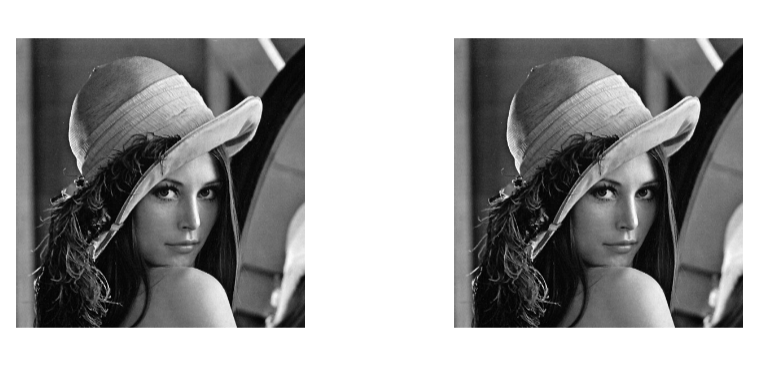

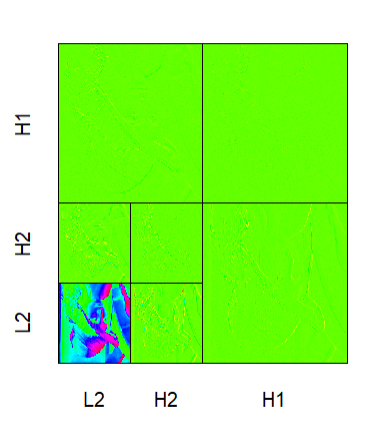

Como podemos observar, el código previo nos descompone la imagen en distintas capas, según el valor de los coeficientes de la imagen, y posteriormente reconstruye la imagen original. Este primer código nos permitió comprender el funcionamiento de la transformada de wavelets y cómo, al manipular las capas que conservamos de la descomposición, podemos influir en la compresión de la imagen (quitando detalle, suavizando, qitando ruido...). Pese a esto, no terminamos de hallar métodos para manipular las capas dentro de los objetos de tipo dwt.2d, que son los nativos de esta librería. Por elolo, decidimos trasladar el proyecto a Python, ya que bajo nuestro punto de vista posee un mayor número de librerías con las qu epoder experimentar y trabajar.

### Compresión de imágenes en Python

Pasamos todo el desarrollo práctico del proyecto a Python.

La compresión de imágenes por wavelets es un proceso que utiliza la transformada wavelet discreta 2D para descomponer una imagen en diferentes frecuencias y direcciones. La transformada wavelet discreta 2D se realiza utilizando una familia de wavelets, como `haar`, `db1`, `sym2` o `coif5`. Los coeficientes resultantes se comprimen mediante un umbral suave y se utilizan para reconstruir la imagen comprimida.

El parámetro `wavelet_family` se utiliza para especificar la familia de wavelets a utilizar. Algunas familias populares incluyen `haar`, `db1`, `sym2` y `coif5`. El parámetro `threshold` se utiliza para establecer el valor del umbral suave utilizado para comprimir los coeficientes wavelet. Los coeficientes cuyo valor absoluto es menor que el umbral se establecen en cero, mientras que los coeficientes cuyo valor absoluto es mayor que el umbral se mantienen sin cambios. El parámetro `filter` se utiliza para especificar el tipo de filtro utilizado para la descomposición wavelet.

El proceso de compresión de imágenes por wavelets implica los siguientes pasos:

1. Cargar la imagen original.
2. Realizar una transformada wavelet discreta 2D en la imagen utilizando una familia de wavelets especificada.
3. Comprimir los coeficientes resultantes mediante un umbral suave.
4. Reconstruir la imagen comprimida utilizando los coeficientes comprimidos.
5. Visualizar la imagen original y la imagen comprimida.

La compresión de imágenes por wavelets puede ser utilizada para reducir el tamaño de las imágenes digitales sin perder demasiada información visual. Sin embargo, es importante tener en cuenta que la calidad de la imagen comprimida depende del valor del umbral suave utilizado y de la familia de wavelets seleccionada.

(1) Uso de la Transformada de Wavelet para la compresión de imágenes .... http://lcr.uns.edu.ar/fvc/NotasDeAplicacion/FVC-Gonzalo%20D%20Acosta.pdf.

(2) Compresión de imágenes con Wavelets y Multiwavelets - Redalyc. https://www.redalyc.org/articulo.oa?id=498850160008.

(3) Tratamiento de imágenes digitales mediante wavelets. http://personales.upv.es/aperis/wavelets/imagenes/indice.htm.

(4) Compresión de imágenes Haar Wavelet - Studocu. https://www.studocu.com/es-mx/document/universidad-autonoma-de-coahuila/algebra-lineal/compresion-de-imagenes-haar-wavelet/3068260.

(5) Compresión de Imágenes Fijas utilizando la Trasformada Wavelet - CORE. https://core.ac.uk/download/pdf/15780665.pdf.

(6) Single-level 2-D discrete wavelet transform - MATLAB dwt2 - MathWorks. https://www.mathworks.com/help/wavelet/ref/dwt2.html.

(7) Filters (Wavelet): Thresholding - MIPAV - National Institutes of Health. https://mipav.cit.nih.gov/pubwiki/index.php/Filters_%28Wavelet%29:_Thresholding.

(8) python - How to find threshold value and which wavelet family to use .... https://stackoverflow.com/questions/59886413/how-to-find-threshold-value-and-which-wavelet-family-to-use-for-low-pass-filter.

#### Representación y compresión de familias de Wavelets con librerías especializadas

In [ ]:
import pywt # pip install pywavelets
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def compress_image(image_path, wavelet_family):
    # Load the image
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Decompose the image using the specified wavelet family
    coeffs = pywt.dwt2(image_array, wavelet_family)
    # Discard some of the coefficients to compress the image
    compressed_coeffs = [pywt.threshold(i, value = 5, mode='garrote') for i in coeffs] #th dfault value = 0.1, mode dfault value = soft
    # Reconstruct the compressed image
    compressed_image = pywt.idwt2(compressed_coeffs, wavelet_family)
    # Convert the numpy array back to an image
    compressed_image = Image.fromarray(np.uint8(compressed_image))
    return compressed_image

# Example usage:
image_path = 'data/Lena.png'
wavelet_family = 'haar'
compressed_image = compress_image(image_path, wavelet_family)
compressed_image.show()
compressed_image.save("./data/Lena_comp_haar_th_5_mode_garrote_filter_LoD.png","PNG")

#### Representación y compresión de familias de Wavelets manualmente

In [ ]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

def daubechies_wavelet(data):

    # Coeficientes de Daubechies
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')

    return cA, cD

def inverse_daubechies_wavelet(cA, cD):

    # Coeficientes inversos
    g0 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    g1 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes inversos
    data_approx = np.convolve(cA, g0, mode='same')
    data_detail = np.convolve(cD, g1, mode='same')

    return data_approx + data_detail

def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    cA = np.convolve(data, h0, mode='same')
    cD = np.convolve(data, h1, mode='same')
        
    return cA, cD

def inverse_haar_wavelet(cA, cD):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    data_approx = np.convolve(cA, h0, mode='same')
    data_detail = np.convolve(cD, h1, mode='same')

    return data_approx + data_detail

def coiflet_wavelet(data):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with wavelet coefficients
    cA = np.convolve(data, [h0, h1, h2, h3], mode='same')
    cD = np.convolve(data, [-h3, h2, -h1, h0], mode='same')

    return cA, cD

def inverse_coiflet_wavelet(cA, cD):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with inverse wavelet coefficients
    data_approx = np.convolve(cA, [h0, h1, h2, h3], mode='same')
    data_detail = np.convolve(cD, [-h3, h2, -h1, h0], mode='same')

    return data_approx + data_detail

def wavelet_compress(image_path, compression_ratio = 0.1, wavelet_family = 'daubechies_1'):

    # Carga de la imagen en escala de grises
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convolución con la wavelet
    if wavelet_family == 'daubechies_1':
        flattened_image = original_image.flatten()
        cA, cD = daubechies_wavelet(flattened_image)

    elif wavelet_family == 'haar':
        flattened_image = original_image.flatten()
        cA, cD = haar_wavelet(flattened_image)

    elif wavelet_family == 'coiflet_1':
        flattened_image = original_image.flatten()
        cA, cD = coiflet_wavelet(flattened_image)

    else:
        raise Exception(f'La familia de wavelets {wavelet_family} no está implementada.')
    
    # Compresión: eliminamos coeficientes por debajo del umbral
    threshold = compression_ratio * np.max(np.abs(cD))
    cD_thresholded = np.where(np.abs(cD) < threshold, 0, cD)

    # Transformada inversa
    if wavelet_family == 'daubechies_1':
        compressed_image_flat = inverse_daubechies_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'haar':
        compressed_image_flat = inverse_haar_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'coiflet_1':
        compressed_image_flat = inverse_coiflet_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)
    
    # Guaradado de la imagen comprimida
    output_image_path = f'./data/Lena_{wavelet_family}.png'
    cv2.imwrite(output_image_path, compressed_image.astype(np.uint8))

    # Representación
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()

    return compressed_image

# Example usage
input_image_path = './data/Lena.png'
wavelet_family = 'coiflet_1'
compression_ratio = 0.1

compressed_image = wavelet_compress(input_image_path, compression_ratio, wavelet_family)

Intentamos implementar las transformaciones continuas de wavelets, con resultados poco satisfactorios.

# JESUS PON TU CODIGO CURSED AQUI SI NO SE TE HA BORRADO DEL DISCO XD

También intentamos realizar la transformación wavelet por niveles manualmente. Los resultados no son correctos, ya que se observa como las sucesivas capas de aproximación sufren un desplazamiento espacial respecto a las de detalle. ESto se debe a que el código no sigue el algoritmo de Mallat.

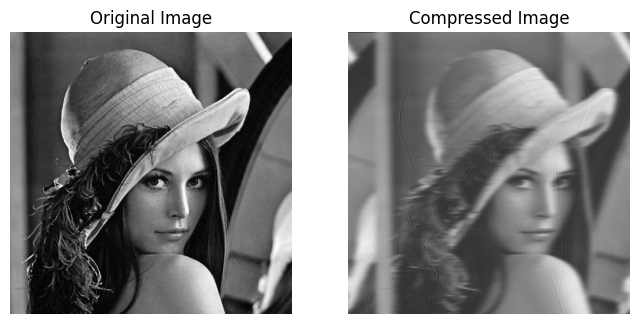

In [1]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')
    return cA, cD

def inverse_haar_wavelet(cA = [], cD = []):

    if not(len(cA) > 0 or len(cD) > 0):
        raise Exception("Debe seleccionar al menos una capa.")
    
    if len(cA) > 0:
        h0 = np.array([0.5, 0.5])
        data_approx = np.convolve(cA, h0, mode = 'same')
    else:
        data_approx = 0
        
    if len(cD) > 0:
        h1 = np.array([-0.5, 0.5])
        data_detail = np.convolve(cD, h1, mode = 'same')
    else:
        data_detail = 0
    
    return data_approx + data_detail

image_path = './data/Lena.png'
n_niveles = 100
cA = []
cD = []
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
flattened_image = original_image.flatten()
cA_0, cD_0 = haar_wavelet(flattened_image)
cA.append(cA_0)
cD.append(cD_0)
for i in range(1, n_niveles):
    cAi, cDi = haar_wavelet(cA[i - 1])
    cA.append(cAi)
    cD.append(cDi)

compressed_image_flat = inverse_haar_wavelet(cA = cA[-1], cD = cD[0])
compressed_image = compressed_image_flat.reshape(original_image.shape)

plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap = 'gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()

#### Aplicación de la transformada de wavelet sobre imagen "Lena.png"

#### Compresión de imágenes RGB

#### Uso de librerías para la transformada

Usamos las librerías {numpy, matplotlib, pywt, PIL, scikit-image}

### Compresión de vídeo